Initial analysis of our datasets to explore any existing trends at surface level

As well as general understanding of behaviour and volatility.

Analysis performed on the files per \Data\Downloading_the_Data.ipynb:

    Data\VIT_history2014-09-17_to_2024-11-11.csv

    Data\BTC_history2014-09-17_to_2024-11-11.csv


In [1]:
import pandas as pd
from datetime import datetime

import matplotlib.pyplot as plt

In [2]:
# setting data from yfinance API downloaded .csvs from \Data\Downloading_the_Data.ipynb

df_vit = pd.read_csv('Data\VIT_history2014-09-17_to_2024-11-11.csv')
df_btc = pd.read_csv('Data\BTC_history2014-09-17_to_2024-11-11.csv')

print('VIT: || ', df_vit.head(1))
print('BTC: || ', df_btc.head(1))

VIT: ||                          Date       Open       High        Low      Close  \
0  2014-09-17 00:00:00-04:00  91.473408  91.997347  91.139165  91.599876   

   Volume  Dividends  Stock Splits  Capital Gains  
0  231900        0.0           0.0            0.0  
BTC: ||                          Date        Open        High         Low       Close  \
0  2014-09-17 00:00:00+00:00  465.864014  468.174011  452.421997  457.334015   

     Volume  Dividends  Stock Splits  
0  21056800        0.0           0.0  


In [3]:
# Comparing our Datasets for consitency.
# They have come from the same source and so consistency is expected.
# The intention is to join our data together with flags for quick analysis and results between the two.

print('VIT: || ', df_vit.describe())
print('BTC: || ', df_btc.describe())

print('VIT: ||', df_vit.shape[0], df_vit.shape[1])
print('BTC: ||', df_btc.shape[0], df_btc.shape[1])

VIT: ||                Open         High          Low        Close        Volume  \
count  2555.000000  2555.000000  2555.000000  2555.000000  2.555000e+03   
mean    258.214213   260.212653   256.025371   258.263336  5.726964e+05   
std     143.754316   144.929981   142.425189   143.752798  4.557098e+05   
min      82.927688    84.662121    69.657471    84.111076  1.355000e+05   
25%     125.345499   125.815624   124.832264   125.294327  3.311500e+05   
50%     208.631967   209.721711   206.855640   208.489288  4.416000e+05   
75%     371.334538   375.134349   367.878169   372.090927  6.401000e+05   
max     625.330017   626.450012   622.109985   625.570007  6.564500e+06   

         Dividends  Stock Splits  Capital Gains  
count  2555.000000        2555.0         2555.0  
mean      0.009506           0.0            0.0  
std       0.082214           0.0            0.0  
min       0.000000           0.0            0.0  
25%       0.000000           0.0            0.0  
50%       0.000

Despite the apparent consistency above we can see the shape outputs give us: 

VIT: || rows: 2555 || columns: 8
BTC: || rows: 3708 || columns: 8

Equally we can see that while VIT appears to be more frequently populated in the Dividends, Stock Splits fields.
We presume this to be due to BTC acting as a currency rather than a stock, which is purely presented as a security due to its presence on Yahoo Finance.
Yahoo Finance being a place where tradable securities (stocks) are generally presented rather than adhering to CryptoCurrency norms.

//// Next to try to esablish a reason for the differences in row count ////
Assume this is due to time-interval. Lets explore:

In [4]:
# We will establish this by exploring the average difference in time of each of the uploads.
# It may be a case to reduce the frequency of reports of one of our datasets to better normalise the data.
# Alternatively we can make the case that more frequent uploads for one dataset will enrich our analysis, rather than hinder it.
# The risk is that we do not want to double-weight an upload if it is a repeat of the same data, or if it simply more frequently reporting over the same time period.

# Separating our main dfs out for this analysis branch
df_vit_datediffs = df_vit['Date']
df_btc_datediffs = df_btc['Date']

df_vit_datediffs['Date'] = pd.to_datetime(df_vit['Date'])
df_btc_datediffs['Date'] = pd.to_datetime(df_btc['Date'])

df_vit_datediffs['upload delta T'] = df_vit_datediffs['Date'].diff()
df_btc_datediffs['upload delta T'] = df_btc_datediffs['Date'].diff()

df_vit_avg_delta_t = df_vit_datediffs['upload delta T'].mean()
df_btc_avg_delta_t = df_btc_datediffs['upload delta T'].mean()

# difference shown as days
print('Uploads by Days:')
print('VIT: || ', df_vit_avg_delta_t)
print('BTC: || ', df_btc_avg_delta_t)

# converting to hours:

df_vit_avg_delta_t_hours = df_vit_avg_delta_t.total_seconds() / 3600
df_btc_avg_delta_t_hours = df_btc_avg_delta_t.total_seconds() / 3600

print('Uploads by Hours:')
print('VIT: || ', df_vit_avg_delta_t_hours)
print('BTC: || ', df_btc_avg_delta_t_hours)

Uploads by Days:
VIT: ||  1 days 10:48:58.919342208
BTC: ||  1 days 00:00:00
Uploads by Hours:
VIT: ||  34.816366483888885
BTC: ||  24.0


C:\Users\PC4475911\AppData\Local\Temp\ipykernel_32792\3709965623.py:10: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  df_vit_datediffs['Date'] = pd.to_datetime(df_vit['Date'])
C:\Users\PC4475911\AppData\Local\Temp\ipykernel_32792\3709965623.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_vit_datediffs['Date'] = pd.to_datetime(df_vit['Date'])
C:\Users\PC4475911\AppData\Local\Temp\ipykernel_32792\3709965623.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in th

In [5]:
# First we are going to normalise our datasets to YYYY-MM-DD format.
# This presents an issue as BTC operates at 00:00:00 +- 00
# While VIT operates at 00:00:00 - 04:00
# For the purposes of this analysis we accept this to normalise as the same day
# Given that they report on the same day regardless of time of reporting.
# Therefore, utc = True to normalise and allow conversion (rather than simply substringing and converting...)


# Confirming column as datetime format
df_vit['Date'] = pd.to_datetime(df_vit['Date'], utc=True)
df_btc['Date'] = pd.to_datetime(df_btc['Date'], utc=True)


df_vit['Date'] = df_vit['Date'].dt.strftime('%Y-%m-%d')
df_btc['Date'] = df_btc['Date'].dt.strftime('%Y-%m-%d')

print('VIT: || ', df_vit.head(1))
print('BTC: || ', df_btc.head(1))

VIT: ||           Date       Open       High        Low      Close  Volume  Dividends  \
0  2014-09-17  91.473408  91.997347  91.139165  91.599876  231900        0.0   

   Stock Splits  Capital Gains  
0           0.0            0.0  
BTC: ||           Date        Open        High         Low       Close    Volume  \
0  2014-09-17  465.864014  468.174011  452.421997  457.334015  21056800   

   Dividends  Stock Splits  
0        0.0           0.0  


It appears there is a difference in upload schedule:

Uploads by Days:
VIT: ||  1 days 10:48:58.919342208
BTC: ||  1 days 00:00:00

Uploads by Hours:
VIT: ||  34.816366483888885
BTC: ||  24.0

This would be to say that there is (1) BTC upload per day 0.689 VIT uploads per day.

This is also confirmed if we divide our VIT Column Count by our BTC Column Count:

2555 / 3708 = 0.689

// * The average above can be misleading: * //
**** This is due to VIT only uploading during Market hours.
**** BTC is uploading outside of Market Hours, including weekends.
**** i.e. There is a difference in upload schedule, but not as the avg would imply.

Meaning we now have the option to noramlise or simply proceed as so. 

Given that time series is linear regardless, we will work with the data as is. 

Potentially we can normalise down the line to see the impact, if any, this would have on results.


//// Now lets check our data for missing values and explore the possible causes ////

In [6]:
# This code will return anoy columns where the average number of null values is >75%
vit_most_missing_cols = set(df_vit.columns[df_vit.isnull().mean() > 0.75])
btc_most_missing_cols = set(df_btc.columns[df_btc.isnull().mean() > 0.75])

print(vit_most_missing_cols)
print(btc_most_missing_cols)

# This code will return anoy columns where the average number of Zero (0) values is >75%
vit_most_zero_cols = set(df_vit.columns[(df_vit == 0).mean() > 0.75])
btc_most_zero_cols = set(df_btc.columns[(df_btc == 0).mean() > 0.75])

print(vit_most_zero_cols)
print(btc_most_zero_cols)

set()
set()
{'Dividends', 'Capital Gains', 'Stock Splits'}
{'Dividends', 'Stock Splits'}


In [7]:
# Lets look deeper into where the values for these columns are not zero, in that case.

# df_vit[df_vit['Capital Gains'] != 0].head(50)
# df_btc[df_btc['Capital Gains'] != 0].head(50)

# df_vit[df_vit['Dividends'] != 0].head(50)
# df_btc[df_btc['Dividends'] != 0].head(50)

# df_vit[df_vit['Stock Splits'] != 0].head(50)
df_btc[df_btc['Stock Splits'] != 0].head(50)

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits


From the analysis we can see that:
    VIT: ()
    BTC: ()
There are no columns where the value is >75% null.

However, we've seen that our data may also contain a lot of '0' where data is not otherwise available. 

Let's see what that looks like:
    VIT: {'Capital Gains', 'Dividends', 'Stock Splits'}
    BTC: {'Dividends', 'Stock Splits'}
We can see then that for both datasets, dividends & stock splits are >75% Zero (0).

Capital Gains for VIT is always zero, while BTC has no such column. 


VIT:
    We can see that VIT has given dividends infrequently, less than 50 times in the past 10 years. 
    We can also see that VIT has only one entry where 'Stock Splits' is not zero.

BTC:
    BTC has no non-zero values for dividends.
    BTC has no non-zero values for stock splits.


This is important as it comes down to business understanding and what this means for our data.

Dividends are given as frequently as the board of directors decides to issue dividends to shareholders.
This is often once per Year, possibly per Half Year or Quarter Year.

BTC is not a stock but rather a decentralised currency with no shareholders, and so dividends are never granted (never not Zero (0)).

Stock splits are a decision taken toincrease the number of shares, reducing the value of each share. 
i.e. where a customer has 1 share at $100 and the business decides to share split 1 to 4
    The customer now has 4 shares at $25 each.

VIT has never performed a stock split.

BTC is not a stock but rather a decentralised currency with no shareholders, and so stock splits will never occur.
BTC is already splittable into its componetnts where 1 BTC = 1 BTC and 0.0001 BTC = 0.0001 BTC.

*Given that we understand this data per the above and that this is not anomylous or incorrect, we will retain 'Dividends'.

**We will remove Stock Splits & Capital Gains as they are both either always 0 or nonexistent to each dataset. 


//// Now to join our Datasets to analyse together ////

In [8]:
df_vit.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Capital Gains
0,2014-09-17,91.473408,91.997347,91.139165,91.599876,231900,0.0,0.0,0.0
1,2014-09-18,91.888929,92.250272,91.780525,92.232201,231100,0.0,0.0,0.0
2,2014-09-19,92.521290,92.521290,91.455334,91.834747,198900,0.0,0.0,0.0
3,2014-09-22,91.717278,91.717278,90.750692,91.012665,271000,0.0,0.0,0.0
4,2014-09-23,90.750715,91.193355,90.678445,90.732651,268200,0.0,0.0,0.0


In [9]:
# First we will create a flag for each of our Datasets to avoid losing track of them in our new table.

# Adding flag for BTC, VIT in the joined dataset
df_vit['Stock'] = 'VIT'
df_btc['Stock'] = 'BTC'


# Dropping redundant columns for each dataset
# Stock splits & Capital Gains are always 0
df_vit.drop(['Stock Splits', 'Capital Gains'], axis=1, inplace=True)
# Capital Gains does not exist in the BTC table
df_btc.drop(['Stock Splits'], axis=1, inplace=True)

# joining the datasets
df = pd.concat([df_vit, df_btc], ignore_index=True)

df.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock
0,2014-09-17,91.473408,91.997347,91.139165,91.599876,231900,0.0,VIT
1,2014-09-18,91.888929,92.250272,91.780525,92.232201,231100,0.0,VIT
2,2014-09-19,92.521290,92.521290,91.455334,91.834747,198900,0.0,VIT
3,2014-09-22,91.717278,91.717278,90.750692,91.012665,271000,0.0,VIT
4,2014-09-23,90.750715,91.193355,90.678445,90.732651,268200,0.0,VIT


In [10]:
# Exploring our joined dataset for quick analysis.

# VIT-BTC
print('VIT-BTC: || ', df.head(1))
print('VIT-BTC: || ', df.tail(1))
print('VIT-BTC: || ', df.shape[0], df.shape[1])
# print('VIT-BTC: || ' , df.describe())

# VIT
print('VTC: || ', df_vit.head(1))
print('VTC: || ', df_vit.tail(1))
print('VTC: || ', df_vit.shape[0], df_vit.shape[1])
# print('VTC: || ' , df_vit.describe())

# BTC
print('BTC: || ', df_btc.head(1))
print('BTC: || ', df_btc.tail(1))
print('BTC: || ', df_btc.shape[0], df_btc.shape[1])
# print('BTC: || ' , df_btc.describe())

VIT-BTC: ||           Date       Open       High        Low      Close  Volume  Dividends  \
0  2014-09-17  91.473408  91.997347  91.139165  91.599876  231900        0.0   

  Stock  
0   VIT  
VIT-BTC: ||              Date          Open          High           Low       Close  \
6262  2024-11-10  76775.546875  81474.421875  76565.429688  80474.1875   

           Volume  Dividends Stock  
6262  82570594495        0.0   BTC  
VIT-BTC: ||  6263 8
VTC: ||           Date       Open       High        Low      Close  Volume  Dividends  \
0  2014-09-17  91.473408  91.997347  91.139165  91.599876  231900        0.0   

  Stock  
0   VIT  
VTC: ||              Date        Open        High         Low       Close  Volume  \
2554  2024-11-08  625.330017  626.450012  622.109985  624.469971  430800   

      Dividends Stock  
2554        0.0   VIT  
VTC: ||  2555 8
BTC: ||           Date        Open        High         Low       Close    Volume  \
0  2014-09-17  465.864014  468.174011  452.421997 

Now we can begin visualisings our datasets to attempt to recognise any immediate patterns.

Immediately we encounter the issue that our BTC value dwarfs our VIT value (close position)

So, in order to normalise each of our close values will be converted as a percentage. 

Maximum value of stock = 100%
Minimum value of stock = 0 (0%)


//// First to simply review the values against each other for our datasets ////
//// Next to apply our min-max normalisation to the dataset and see whether we can learn anything more: ////

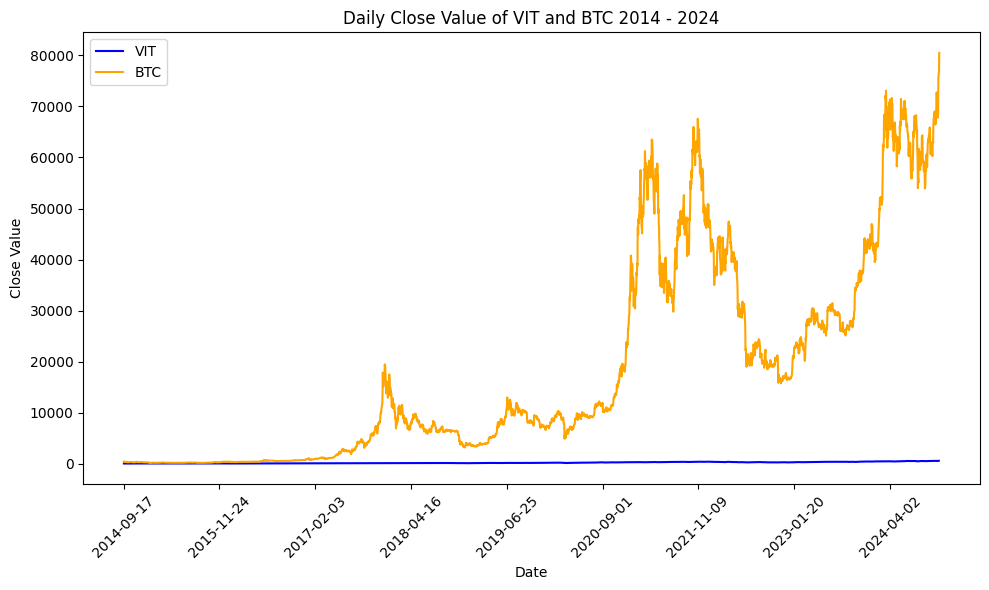

In [11]:
# Attempt 1 as value of stock, poor visibility of the data due to massive differences in value

# While this looks strange, I was encountering errors when trying to plot from their individual datasets
# Regardless of setting to sort by time
# And so now we order by time and then separate from the joined dataset, which immediately works.

# Triple checking that our date column is indeed a date after normalising
df['Date'] = pd.to_datetime(df['Date'])

# separating our datasets into their old df_vit and df_btc datasets now normalised
df_vit = df[df['Stock'] == 'VIT'].sort_values('Date')  # Sort by Date
df_btc = df[df['Stock'] == 'BTC'].sort_values('Date')  # Sort by Date

plt.figure(figsize=(10, 6))

plt.plot(df_vit['Date'], df_vit['Close'], label='VIT', color='Blue')

plt.plot(df_btc['Date'], df_btc['Close'], label='BTC', color='Orange')

plt.xlabel('Date')
plt.ylabel('Close Value')
plt.title('Daily Close Value of VIT and BTC 2014 - 2024')
plt.legend()

# Had to adjust date interval to avoid overcrowing the x-axis
plt.xticks(df_vit['Date'][::300], rotation=45)
plt.tight_layout()
plt.show()

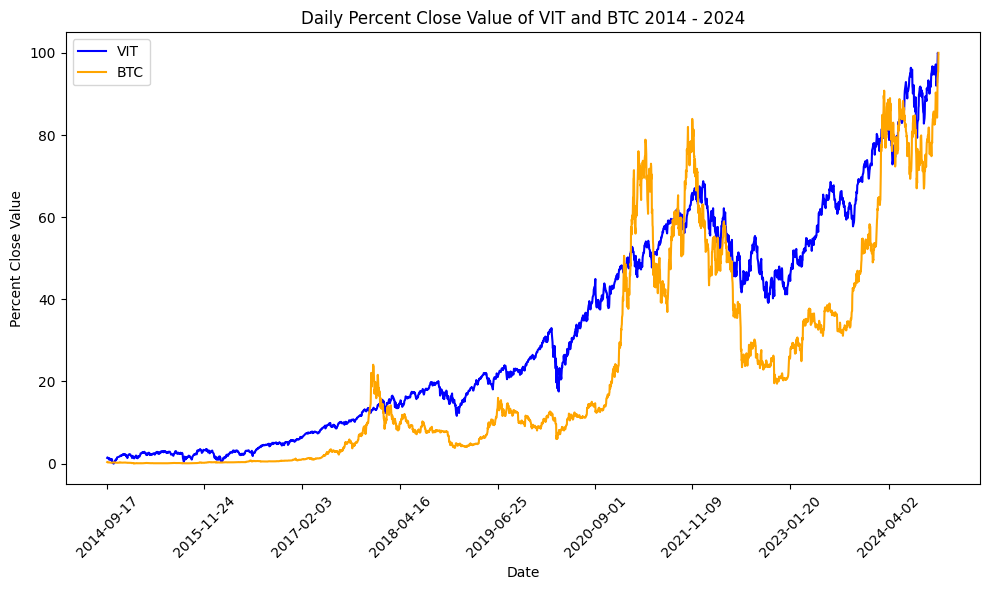

In [12]:
# Attempt two using percentage to represent stock value based on their max(Close).
# This is to normalise by min-max where the minimum = 0% and the maximum = 100%

# The below will set these for each of our stocks as so.
df_vit['Percent Close'] = ((df_vit['Close'] - df_vit['Close'].min()) /
                           (df_vit['Close'].max() - df_vit['Close'].min())) * 100
df_btc['Percent Close'] = ((df_btc['Close'] - df_btc['Close'].min()) /
                           (df_btc['Close'].max() - df_btc['Close'].min())) * 100

plt.figure(figsize=(10, 6))

plt.plot(df_vit['Date'], df_vit['Percent Close'], label='VIT', color='Blue')

plt.plot(df_btc['Date'], df_btc['Percent Close'], label='BTC', color='Orange')

plt.xlabel('Date')
plt.ylabel('Percent Close Value')
plt.title('Daily Percent Close Value of VIT and BTC 2014 - 2024')
plt.legend()

# Had to adjust date interval to avoid overcrowing the x-axis
plt.xticks(df_vit['Date'][::300], rotation=45)
plt.tight_layout()
plt.show()

Now we can see a much better overlay of the values of the stock on the percentage basis and try to draw and correlation.

We can also map this mathematically with our +- to see where the difference trends towards 0 and visualise that. 

For the moment, at a glance, we can see the volatility of BTC is very hard to assign true correlation. 

However, it does appear that the initial rise from 2017 to 2021 align with VIT.

Additionally, the drop in 2023 aligns. 

And, the resurgence towards 2024 also aligns. 

It must be said that this could simply be general market forces (such as Covid around 2021), and perhaps this is true of many other stocks. 

However our concern for this analysis is purely tech stock, represented by VIT. 

Separately, is whether we can predict them!